In [20]:
% matplotlib inline
import pandas as pd

In [2]:
def aoi_group(area):
    area_type = area[0]
    types = {
        'f': 'face',
        'n': 'nowhere',
        'l': 'logo',
    }
    return types[area_type]

In [3]:
import os
dfs = []
dirname = 'fixations'
for filename in os.listdir(dirname):
    df = pd.read_csv(dirname+'/'+filename, sep='\t', index_col=False)
    df['AOI group'] = df['AOI'].map(aoi_group)
    df = df.drop(['Comments', 'Unnamed: 19', 'SlideNr', 'Trial Category'], axis=1)
    dfs.append(df)

In [4]:
all_df = pd.concat(dfs).reset_index(drop=True).drop('ID', axis=1)
all_df.columns = [name.replace(" ", "") for name in all_df.columns]
all_df.to_csv('all_fixations.txt', sep=';', index=False)


In [5]:
df = pd.read_csv('all_fixations.txt', sep=';')
df['LogoCategory'] = df['TrialName'].map(lambda s: s[0])
df['BackgroundCategory'] = df['TrialName'].map(lambda s: s[1])
df

,SubjectName,TrialID,TrialSequence,CountInTrial,StartTime,Length,PosX,PosY,SubjectCategory,Age,Sex,Handedness,TrialName,AOI,AOIgroup,LogoCategory,BackgroundCategory
0,S0302,0,0,1,0,308,"986,606323242188","614,169799804688",NaN,NaN,NaN,NaN,KF_001.jpg,nowhere,nowhere,K,F
1,S0302,0,0,2,320,264,"1059,84375","600,514221191406",NaN,NaN,NaN,NaN,KF_001.jpg,nowhere,nowhere,K,F
2,S0302,0,0,3,606,224,"1088,01745605469","838,78759765625",NaN,NaN,NaN,NaN,KF_001.jpg,nowhere,nowhere,K,F
3,S0302,0,0,4,858,260,"1026,591796875","565,269348144531",NaN,NaN,NaN,NaN,KF_001.jpg,nowhere,nowhere,K,F
4,S0302,0,0,5,1120,194,"1001,12451171875","590,458190917969",NaN,NaN,NaN,NaN,KF_001.jpg,nowhere,nowhere,K,F
5,S0302,0,0,6,1336,252,"998,858215332031","251,317321777344",NaN,NaN,NaN,NaN,KF_001.jpg,fkf01,face,K,F
6,S0302,0,0,7,1590,490,"963,882141113281","247,108901977539",NaN,NaN,NaN,NaN,KF_001.jpg,fkf01,face,K,F
7,S0302,0,0,8,2128,202,"1350,38708496094","870,158874511719",NaN,NaN,NaN,NaN,KF_001.jpg,nowhere,nowhere,K,F
8,S0302,0,0,9,2332,244,"1368,50708007813","919,926879882813",NaN,NaN,NaN,NaN,KF_001.jpg,nowhere,nowhere,K,F
9,S0302,0,0,10,2590,114,"1403,61926269531","1051,62060546875",NaN,NaN,NaN,NaN,KF_001.jpg,nowhere,nowhere,K,F


### Put the dataframes into SQL database to use SQL for querying

In [6]:
import sqlite3

conn = sqlite3.connect('eye_data.db')

df.to_sql('fixations', conn, if_exists='replace', index=False)

df2 = pd.read_csv('all_saccades.txt', sep=';')
df2['LogoCategory'] = df2['TrialName'].map(lambda s: s[0])
df2['BackgroundCategory'] = df2['TrialName'].map(lambda s: s[1])
df2.to_sql('saccades', conn, if_exists='replace', index=False)

### Number of fixations to each area of interest grouped by logo type and background type

In [9]:
pd.read_sql_query("select COUNT(*), AOIgroup, LogoCategory, BackgroundCategory from fixations GROUP BY AOIgroup, LogoCategory, BackgroundCategory", conn)

,COUNT(*),AOIgroup,LogoCategory,BackgroundCategory
0,5916,face,K,F
1,5612,face,U,F
2,2911,logo,K,F
3,3817,logo,K,L
4,3857,logo,U,F
5,4825,logo,U,L
6,5208,nowhere,K,F
7,9550,nowhere,K,L
8,4686,nowhere,U,F
9,8584,nowhere,U,L


### Sum of fixations length to each area of interest grouped by logo type and background type

In [10]:
pd.read_sql_query("select SUM(Length), AOIgroup, LogoCategory, BackgroundCategory from fixations GROUP BY AOIgroup, LogoCategory, BackgroundCategory", conn)

,SUM(Length),AOIgroup,LogoCategory,BackgroundCategory
0,1537954,face,K,F
1,1434350,face,U,F
2,669292,logo,K,F
3,982432,logo,K,L
4,924384,logo,U,F
5,1288326,logo,U,L
6,1231558,nowhere,K,F
7,2388292,nowhere,K,L
8,1092360,nowhere,U,F
9,2143796,nowhere,U,L


### Sum of fixation length to different areas of interest

In [11]:
pd.read_sql_query("select SUM(Length), AOIgroup from fixations GROUP BY AOIgroup", conn)

,SUM(Length),AOIgroup
0,2972304,face
1,3864434,logo
2,6856006,nowhere


### Sum of fixation length to different areas of interest grouped by logo type

In [16]:
pd.read_sql_query("select SUM(Length), AOIgroup, LogoCategory from fixations GROUP BY AOIgroup, LogoCategory", conn)

,SUM(Length),AOIgroup,LogoCategory
0,1537954,face,K
1,1434350,face,U
2,1651724,logo,K
3,2212710,logo,U
4,3619850,nowhere,K
5,3236156,nowhere,U


### Number  of first saccades grouped by background and logo types

In [17]:
pd.read_sql_query("""
select COUNT(*), AOIgroup, LogoCategory, BackgroundCategory
from saccades
WHERE CountInTrial=1 AND TrialSe
GROUP BY AOIgroup, LogoCategory, BackgroundCategory""", conn)

,COUNT(*),AOIgroup,LogoCategory,BackgroundCategory
0,673,face,K,F
1,725,face,U,F
2,144,logo,K,F
3,574,logo,K,L
4,112,logo,U,F
5,593,logo,U,L
6,182,nowhere,K,F
7,426,nowhere,K,L
8,163,nowhere,U,F
9,407,nowhere,U,L


### Number of first saccades to different areas of interest

In [14]:
pd.read_sql_query("""
select COUNT(*), AOIgroup
from saccades
WHERE CountInTrial=1
GROUP BY AOIgroup""", conn)

,COUNT(*),AOIgroup
0,1398,face
1,1423,logo
2,1178,nowhere


### Number of first saccades to different areas of interest grouped by background type

In [15]:
pd.read_sql_query("""
select COUNT(*), AOIgroup, BackgroundCategory
from saccades
WHERE CountInTrial=1
GROUP BY AOIgroup, BackgroundCategory""", conn)

,COUNT(*),AOIgroup,BackgroundCategory
0,1398,face,F
1,256,logo,F
2,1167,logo,L
3,345,nowhere,F
4,833,nowhere,L


### Number of all saccades to different areas of interest grouped by logo category and background type

In [24]:
pd.read_sql_query("""
select COUNT(*), AOIgroup, LogoCategory, BackgroundCategory
from saccades
GROUP BY AOIgroup, LogoCategory, BackgroundCategory""", conn)

,COUNT(*),AOIgroup,LogoCategory,BackgroundCategory
0,5597,face,K,F
1,5302,face,U,F
2,2900,logo,K,F
3,3797,logo,K,L
4,3845,logo,U,F
5,4804,logo,U,L
6,4538,nowhere,K,F
7,8570,nowhere,K,L
8,4008,nowhere,U,F
9,7605,nowhere,U,L


In [38]:
df4 = pd.read_sql_query("""
select COUNT(*), AOIgroup, LogoCategory, BackgroundCategory
from saccades
WHERE AOIGroup='logo'
GROUP BY AOIgroup, LogoCategory, BackgroundCategory""", conn)

df4

,COUNT(*),AOIgroup,LogoCategory,BackgroundCategory
0,2900,logo,K,F
1,3797,logo,K,L
2,3845,logo,U,F
3,4804,logo,U,L


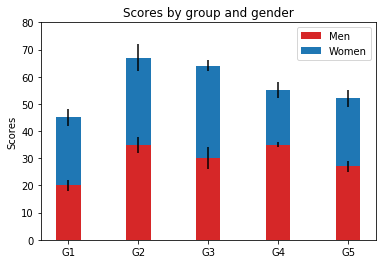

In [21]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [ ]:
plt.bar()

In [26]:
df3 = pd.read_sql_query("""
select COUNT(*), AOIgroup, LogoCategory, BackgroundCategory
from saccades
WHERE AOIGroup='logo' and countInTrial=1
GROUP BY AOIgroup, LogoCategory, BackgroundCategory""", conn)

In [82]:
df5 = pd.read_sql_query("""
select COUNT(*), AOIgroup, LogoCategory, BackgroundCategory
from saccades
WHERE AOIGroup='logo' AND TrialSequence <= 400
GROUP BY AOIgroup, LogoCategory, BackgroundCategory""", conn)

df5

,COUNT(*),AOIgroup,LogoCategory,BackgroundCategory
0,2900,logo,K,F
1,3797,logo,K,L
2,3845,logo,U,F
3,4804,logo,U,L


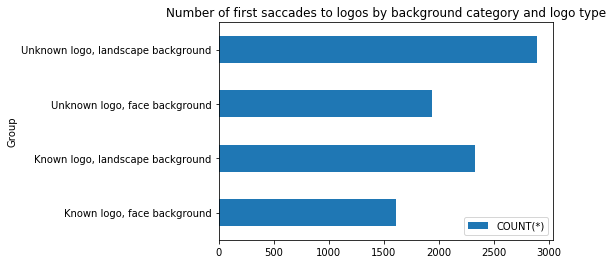

In [70]:
d = {
    'KF': 'Known logo, face background',
    'UL': 'Unknown logo, landscape background',
    'KL': 'Known logo, landscape background',
    'UF': 'Unknown logo, face background'
}
df5['Group'] = (df5['LogoCategory'] + df5['BackgroundCategory']).apply(lambda text: d[text])

df5.plot(x='Group', y='COUNT(*)', kind='barh', title='Number of first saccades to logos by background category and logo type')

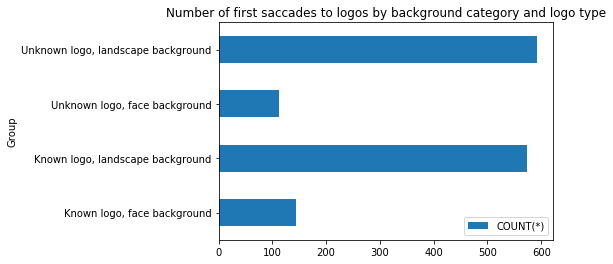

In [43]:
d = {
    'KF': 'Known logo, face background',
    'UL': 'Unknown logo, landscape background',
    'KL': 'Known logo, landscape background',
    'UF': 'Unknown logo, face background'
}
df3['Group'] = (df3['LogoCategory'] + df3['BackgroundCategory']).apply(lambda text: d[text])

df3.plot(x='Group', y='COUNT(*)', kind='barh', title='Number of first saccades to logos by background category and logo type')

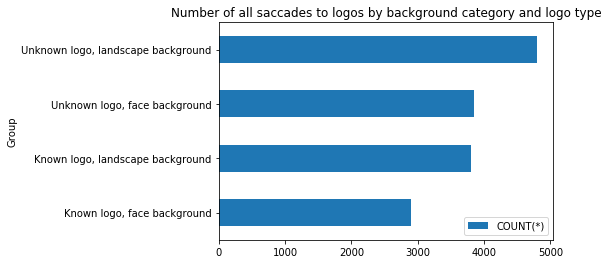

In [44]:
df4['Group'] = (df4['LogoCategory'] + df4['BackgroundCategory']).apply(lambda text: d[text])
df4.plot(x='Group', y='COUNT(*)', kind='barh', title='Number of all saccades to logos by background category and logo type')